<a href="https://colab.research.google.com/github/adithyaGHegde/Computer-Vision-Posture-Analysis/blob/main/Mini_Project_Data_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe opencv-python

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mp_drawing = mp.solutions.drawing_utils #gives us drawing utilities
mp_pose = mp.solutions.pose #the pose estimation model

In [ ]:
def calculate_angle(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return round(angle,2)

### Code to extract required information from video data and then store it in a dataframe

In [ ]:
import pandas as pd

def captureVideoData(filepath, filename):
    #use cv2 to capture the frames from the video and stor it in cap, for a given filename
    cap = cv2.VideoCapture(filepath)

    #create a dataframe for storing values
    df = pd.DataFrame({
        "video_title" : [],
        "timestamps" : [],
        "angle_elbow_right" : [],
        "angle_knee_right" : [],
        "angle_shoulder_right": [],
        "angle_hip_right": [],
        "angle_elbow_left" : [],
        "angle_knee_left" : [],
        "angle_shoulder_left": [],
        "angle_hip_left": []
    })
    #index of df
    i = 0
    #print(filename)
    #set the pose variable as the mp_pose.Pose object only if the minimum detection and tracking confidence(if person is detected or not) are met
    with mp_pose.Pose(min_detection_confidence=0.7,min_tracking_confidence=0.7) as pose:
        #print("Got pose")
        #while video window is being captured/opened
        while cap.isOpened():
            #print("Opened window!")
            #frames don't exist implies video has ended therefore we break
            #cap.read() returns if frame is detected, and then the frame
            frame_exists, frame = cap.read()

            if frame_exists == True:

                #we obtain the width and height of the captured video
                width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

                #we convert the image/frame from BGR to RGB as the pose model requires a frame with RGB values
                image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                image.flags.writeable = False

                #now we store the pose object on the image which is writable now and store it in results which will be used below
                results = pose.process(image)

                #we take it back to how it was
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                try:
                    #index for data frame
                    i = i+1

                    #we obtain all 33 landmarks from the results
                    landmarks = results.pose_landmarks.landmark

                    #we obtain the x,y,z coordinates of the required landmarks
                    shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].z]
                    elbow_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].z]
                    wrist_right = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].z]
                    hip_right = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z]
                    knee_right = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].z]
                    ankle_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].z]

                    shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].z]
                    elbow_left = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].z]
                    wrist_left = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].z]
                    hip_left = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].z]
                    knee_left = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].z]
                    ankle_left = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].z]

                    # thumb_right = [landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].y]
                    timestamp = cap.get(cv2.CAP_PROP_POS_MSEC)

                    # we calculate the required angles based on the function
                    # angle_left = calculate_angle_3D(shoulder_left, elbow_left, wrist_left)
                    # angle_right = calculate_angle_3D(shoulder_right, elbow_right, wrist_right)
                    angle_elbow_left = calculate_angle(shoulder_left, elbow_left, wrist_left)
                    angle_elbow_right = calculate_angle(shoulder_right, elbow_right, wrist_right)
                    angle_knee_left = calculate_angle(hip_left, knee_left, ankle_left)
                    angle_knee_right = calculate_angle(hip_right, knee_right, ankle_right)
                    angle_shoulder_right = calculate_angle(hip_right,shoulder_right,elbow_right)
                    angle_shoulder_left = calculate_angle(hip_left,shoulder_left,elbow_left)
                    angle_hip_right = calculate_angle(knee_right,hip_right,shoulder_right)
                    angle_hip_left = calculate_angle(knee_left,hip_left,shoulder_left)

                    #The values are stores in the dataframe
                    df.loc[i] = [filename,timestamp, angle_elbow_right, angle_knee_right, angle_shoulder_right,angle_hip_right, angle_elbow_left, angle_knee_left, angle_shoulder_left,angle_hip_left]

                    # cv2.putText(image, "Left elbow: "+str(angle_elbow_left),
                    #         tuple(np.multiply(elbow_left[:2], [width,height]).astype(int)),
                    #         cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 2, cv2.LINE_AA )

                    #We show the angles on the video feed
                    cv2.putText(image, "Right elbow: "+str(angle_elbow_right),
                            tuple(np.multiply(elbow_right[:2], [width,height]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 2, cv2.LINE_AA )

                    # cv2.putText(image, "Left Knee: "+str(angle_knee_left),
                    #         tuple(np.multiply(knee_left[:2], [width,height]).astype(int)),
                    #         cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 2, cv2.LINE_AA )
                    cv2.putText(image, "Right Knee: "+str(angle_knee_right),
                            tuple(np.multiply(knee_right[:2], [width,height]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 2, cv2.LINE_AA )
                except:
                    #if pose variable is empty, then pass
                    print("Error!")
                    pass

                #draw all the landmarks on the video feed
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(255,0,0),thickness=2,circle_radius=2),
                    mp_drawing.DrawingSpec(color=(0,255,0),thickness=2,circle_radius=2)
                    )

                #we adjust the window size such that the entire video is displayed
                cv2.namedWindow(filename+' feed', cv2.WINDOW_NORMAL)
                cv2.resizeWindow(filename + ' feed', width, height)

                #put the video on the screen
                cv2.imshow(filename+' feed',image)

                #wait for 10msecs after q is pressed then close the window
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            else:
                break

        #in the end we append each df into a list, at the end we will have the data of each video
        #print(df.head(3))
    #we release the capturing and destroy the window we put on the screen
    cap.release()
    cv2.destroyAllWindows()
    return df

### Code to align the graphs

In [ ]:
def alignFunc(list_of_df):
    align = list_of_df

    minMax = align[0]
    minMaxId = minMax['angle_shoulder_right'].idxmax()
    for df in align:
        max_valID = df['angle_shoulder_right'].idxmax()
        if max_valID < minMaxId:
            minMax = df


    ref = minMax
    max_ref_val = ref['angle_shoulder_right'].max()
    max_ref_idx = ref['angle_shoulder_right'].idxmax()
    print(max_ref_idx, max_ref_val)
    align[0].head(30)

    for df in align:
        max_df_val = df['angle_shoulder_right'].max()
        max_df_idx = df['angle_shoulder_right'].idxmax()
        for index, row in df.iterrows():
            current_value = df.at[index, 'timestamps']

            new_value = current_value + 33.33*(max_ref_idx - max_df_idx)

            df.at[index, 'timestamps'] = new_value
    return align

### Code to get data from every file and save it as a separate df

In [ ]:
def saveCSV(list_of_df, filename):
    #we convert the list of dfs to one big df
    final_df = pd.DataFrame({
        "video_title" : [],
        "timestamps" : [],
        "angle_elbow_right" : [],
        "angle_knee_right" : [],
        "angle_shoulder_right": [],
        "angle_hip_right": [],
        "angle_elbow_left" : [],
        "angle_knee_left" : [],
        "angle_shoulder_left": [],
        "angle_hip_left": []
    })

    for df in list_of_df:
        df['target'] = df['video_title'].str[-5:-4].apply(lambda x: int(x)) # Creating new target variable for the video labels
        df = df.drop(df[df['timestamps'] < 0].index)                # Removing timestamps with value less than 0
        final_df = pd.concat([df,final_df])

    final_df.to_csv('/content/drive/MyDrive/Basketball videos/'+filename)

In [ ]:
players = ['Samuel', 'Adithya', 'Shubham', 'Harsh', 'Jayesh', 'Ketan', 'Junior', 'Rohith', 'Esha']

def collectData(players):
    i = 1
    for player in players:
        final_df = []
        path = '/content/drive/MyDrive/Basketball videos/'+ player +'/'
        #loop all the videos in the folder and run it through this function
        for file in os.listdir(path):
            #for file in os.listdir('E:\\Downloads\\Website code\\static\\files'):
            if file.endswith(".mp4"):
                df = captureVideoData(path+file, file)
                final_df.append(df)

        final_df = alignFunc(final_df)
        saveCSV(final_df, player+'.csv')

collectData(players)

### Plot the graph for each player

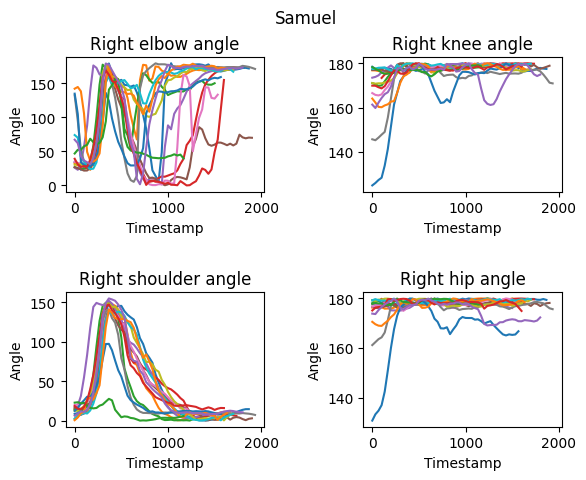

<Figure size 2000x2000 with 0 Axes>

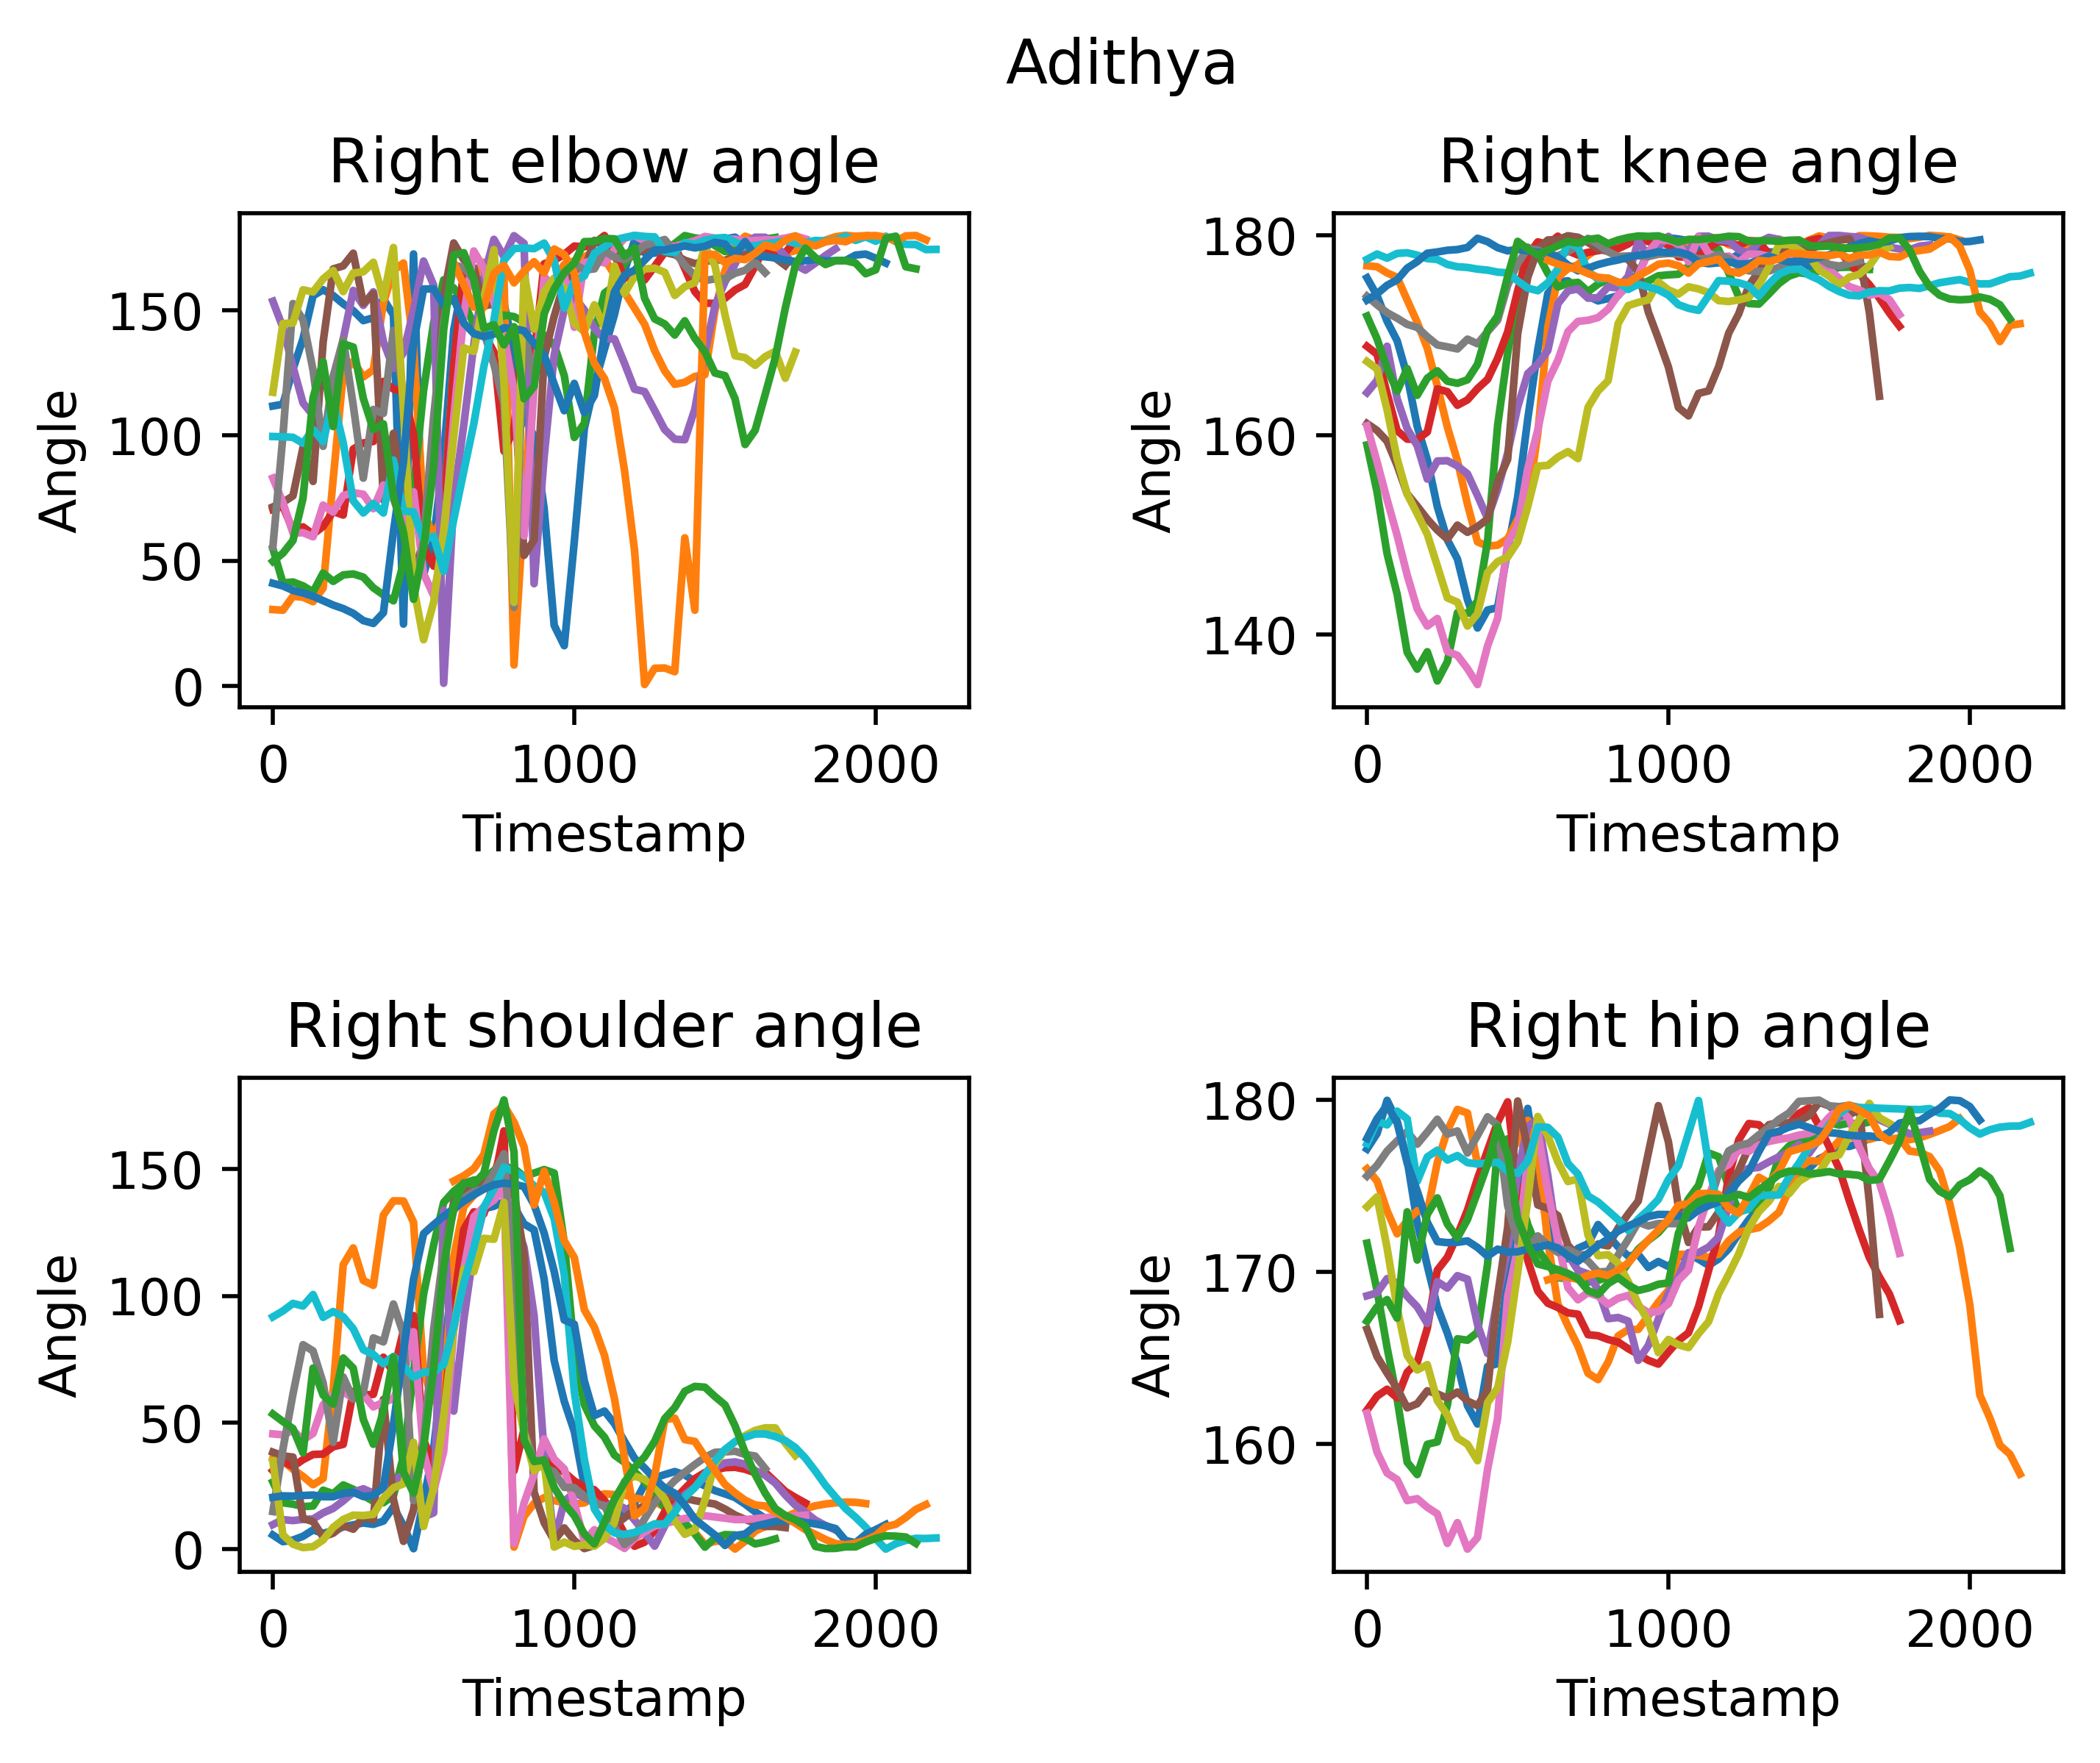

<Figure size 10000x10000 with 0 Axes>

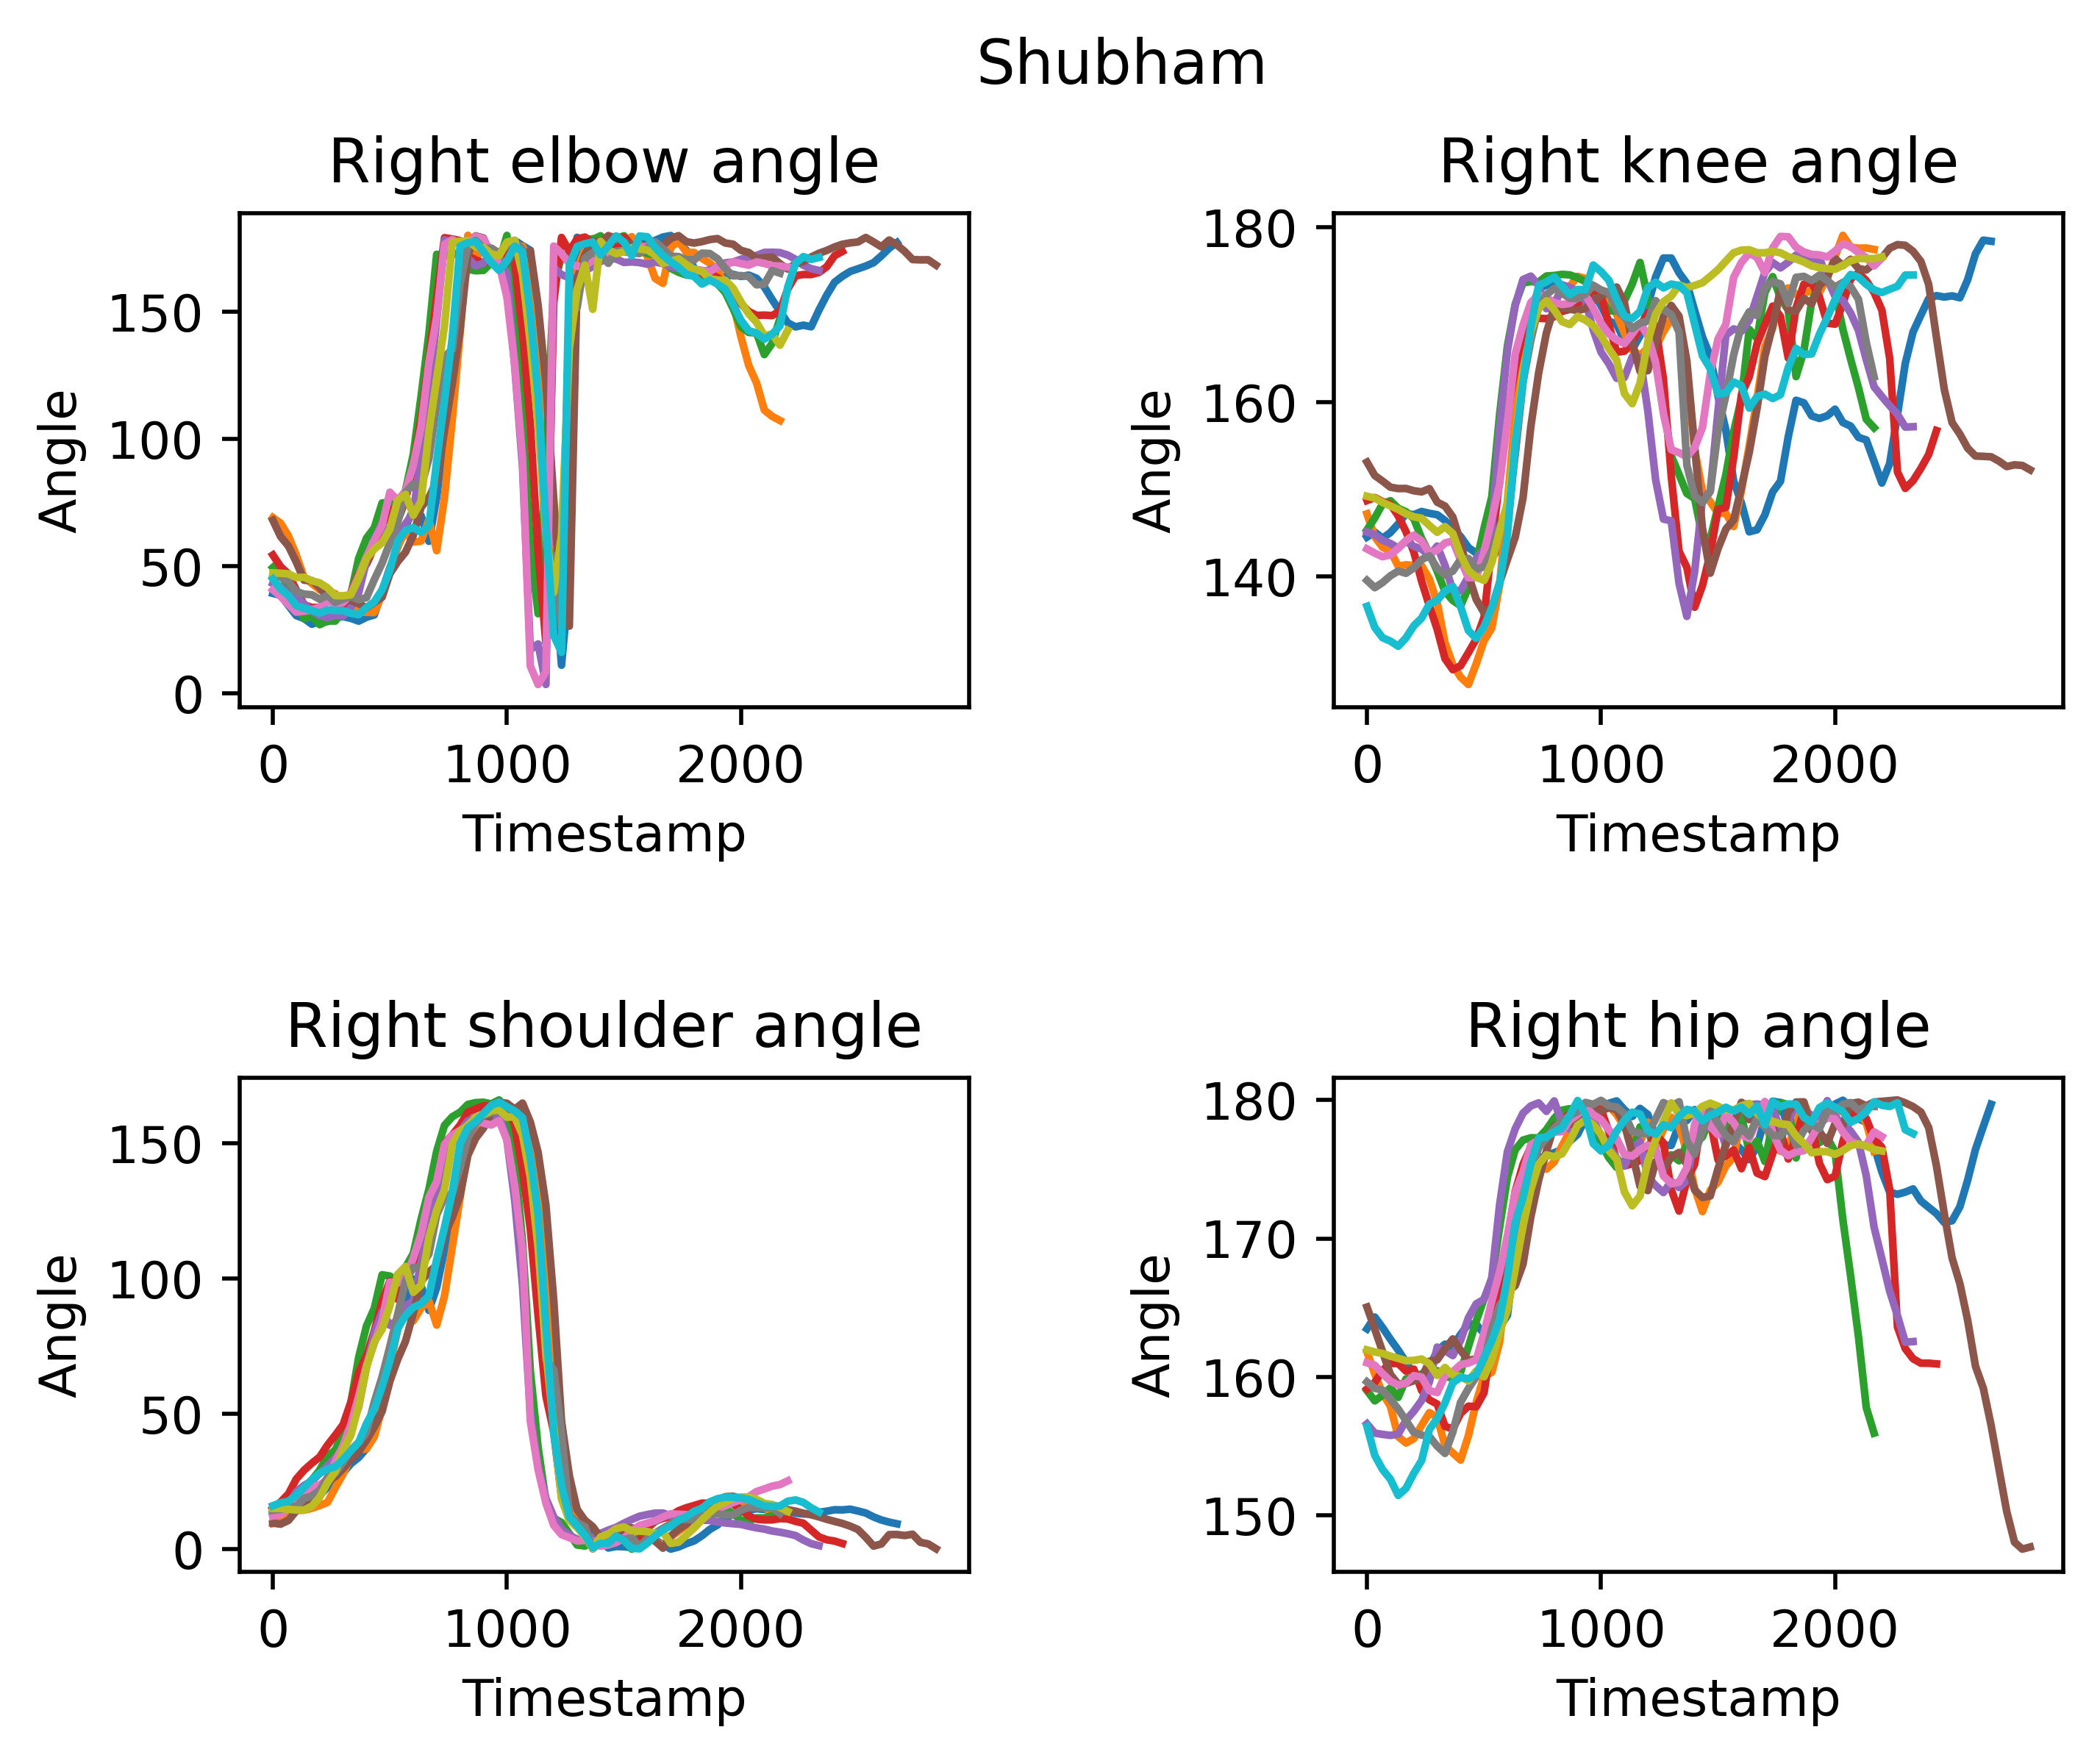

<Figure size 10000x10000 with 0 Axes>

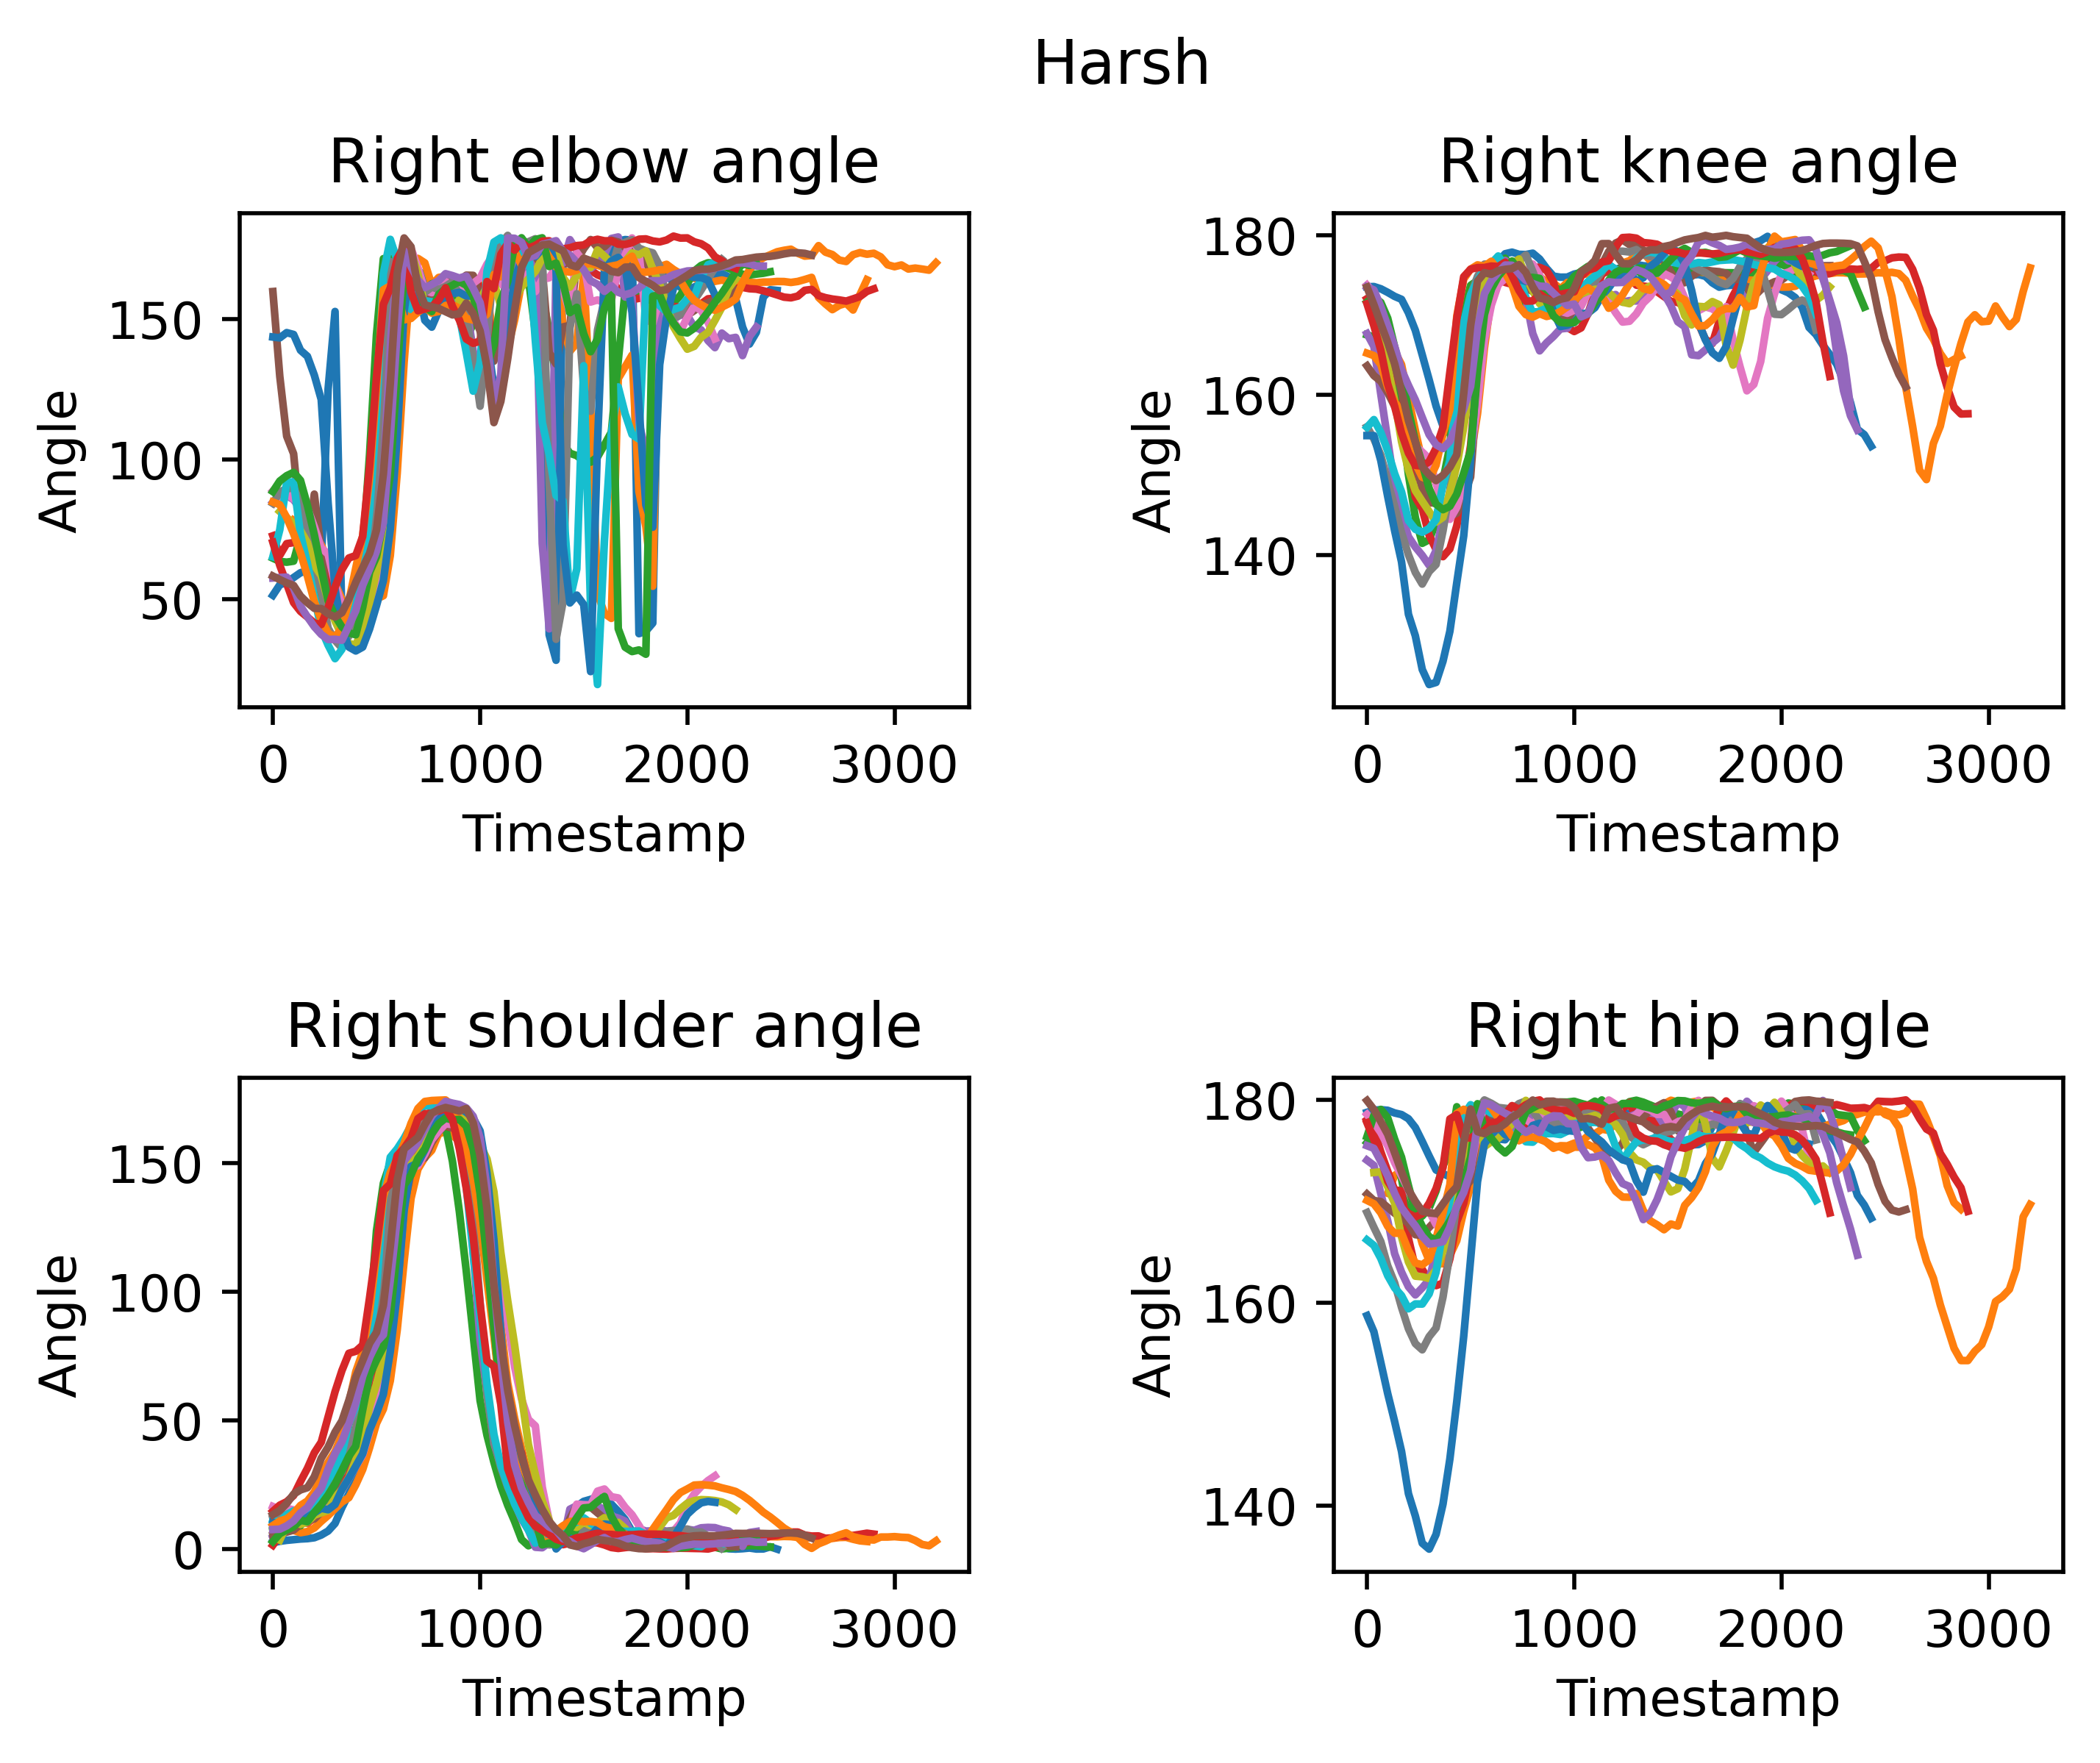

<Figure size 10000x10000 with 0 Axes>

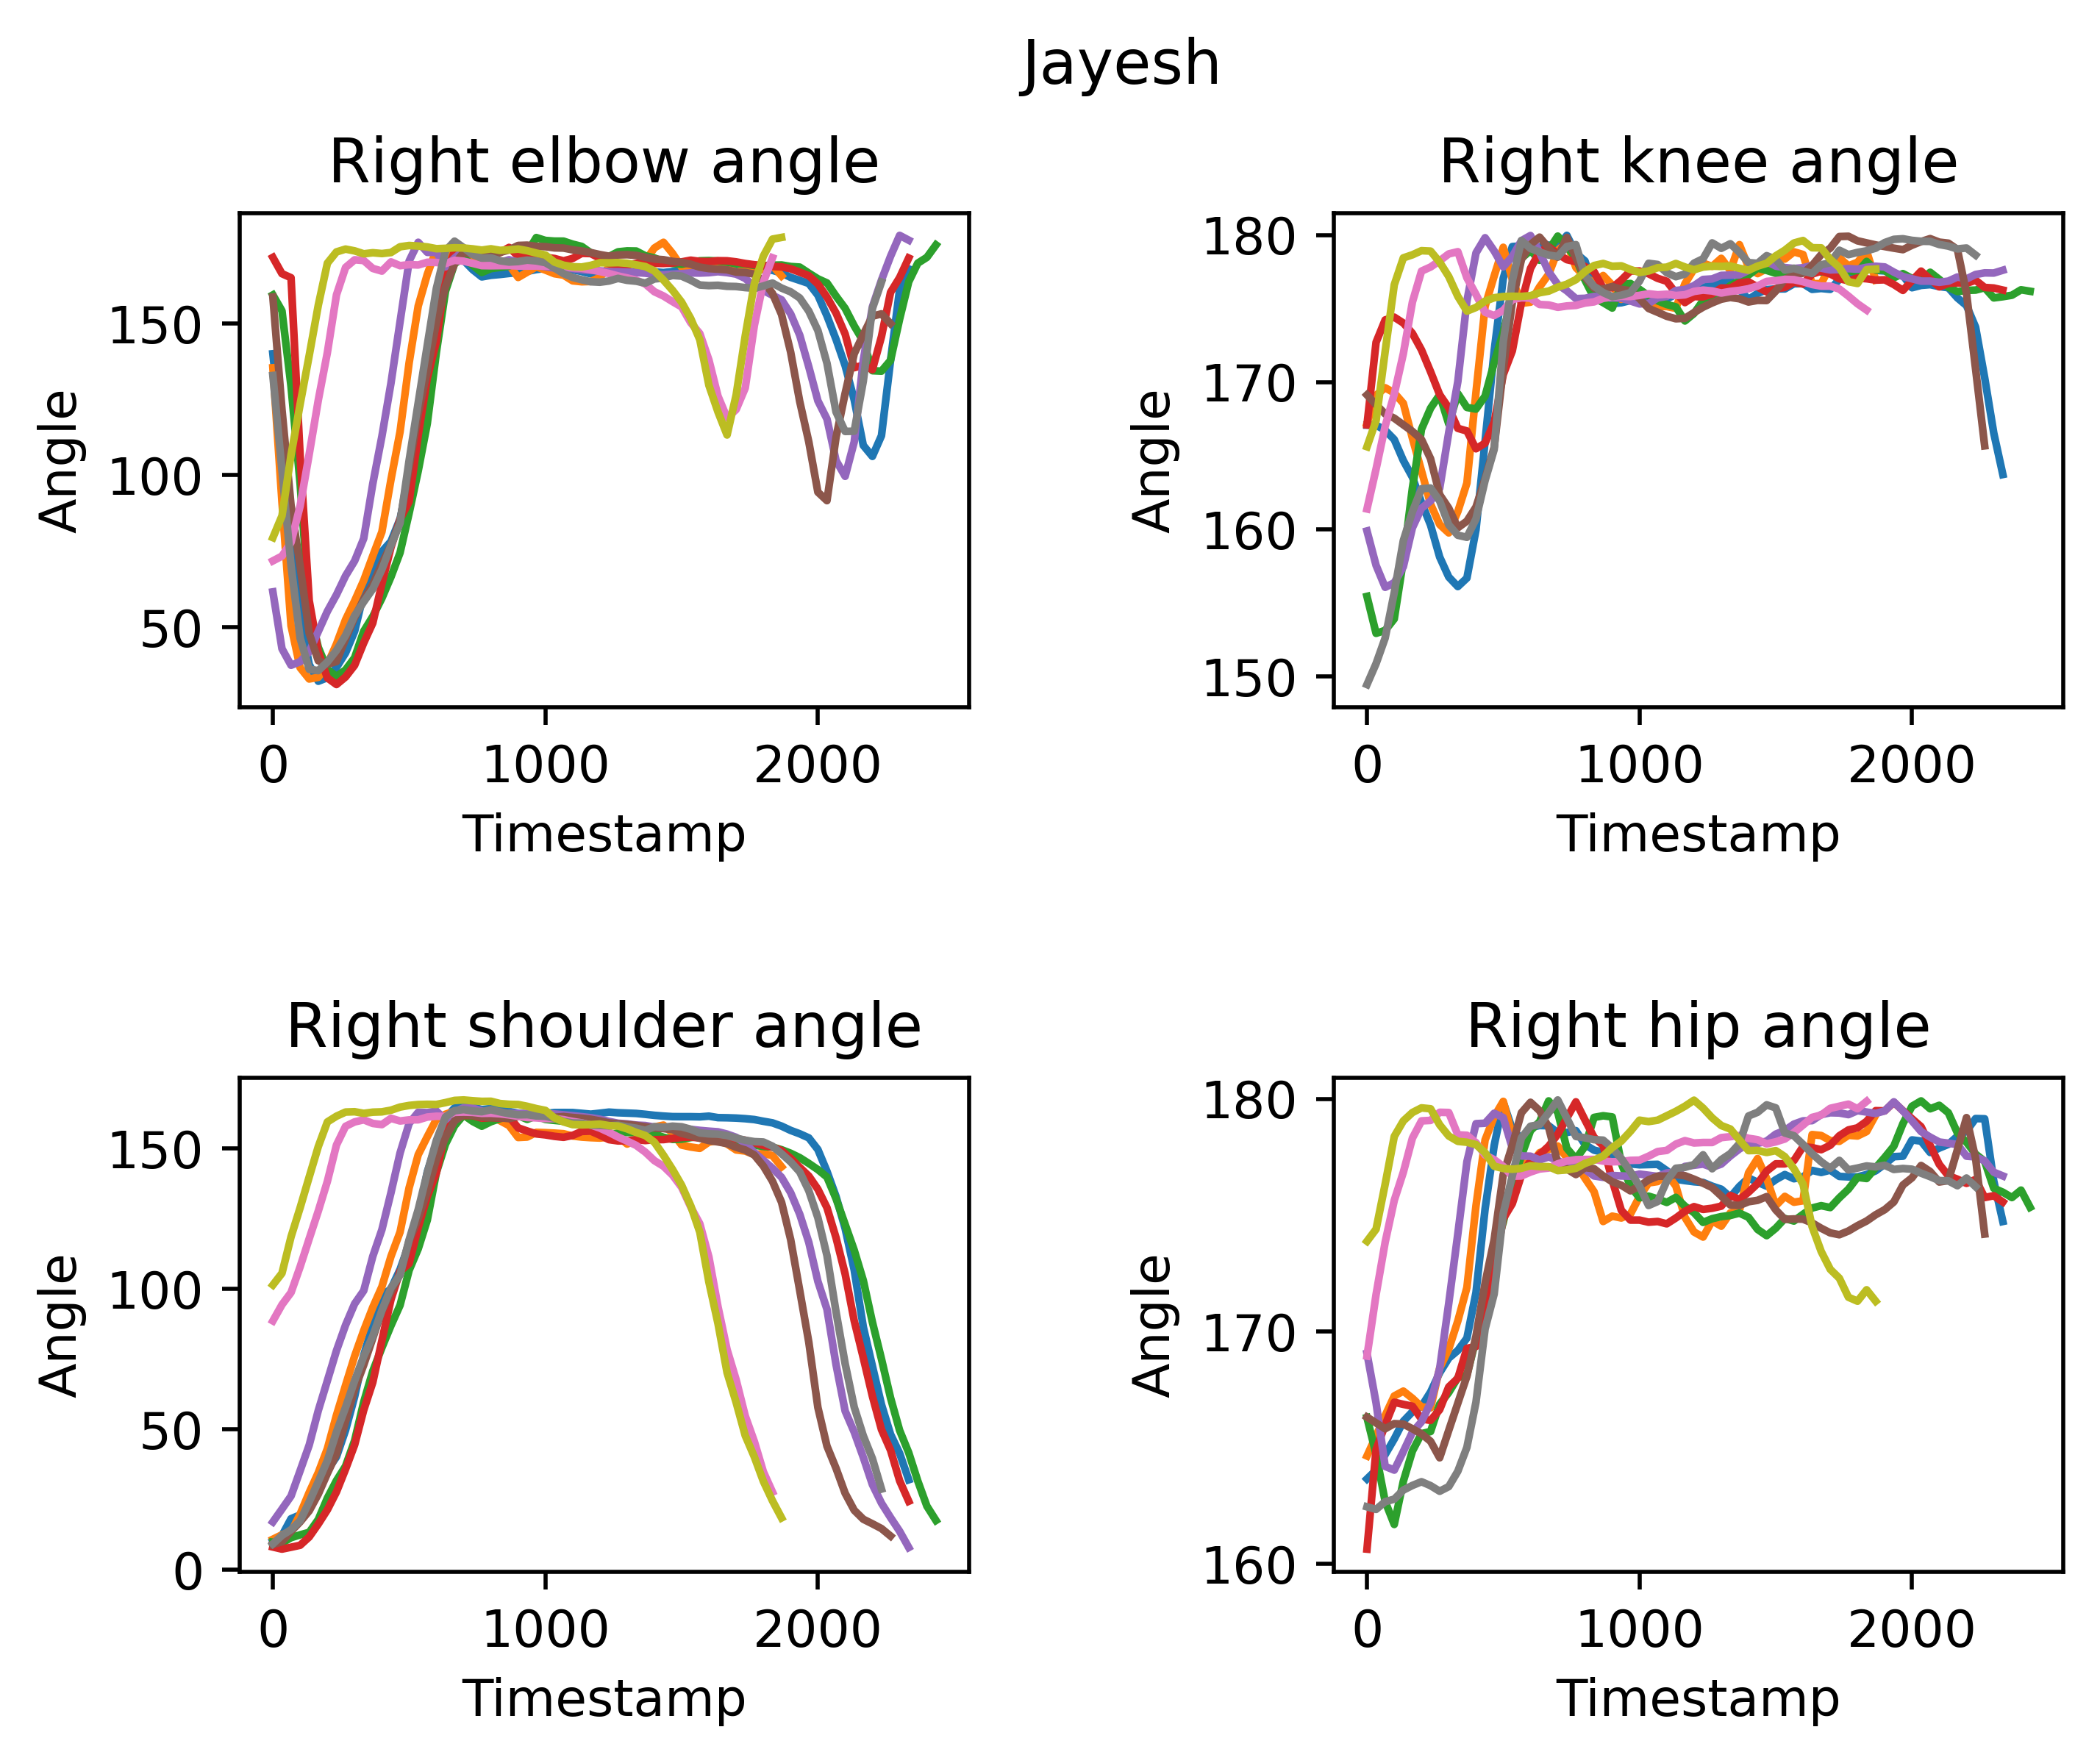

<Figure size 10000x10000 with 0 Axes>

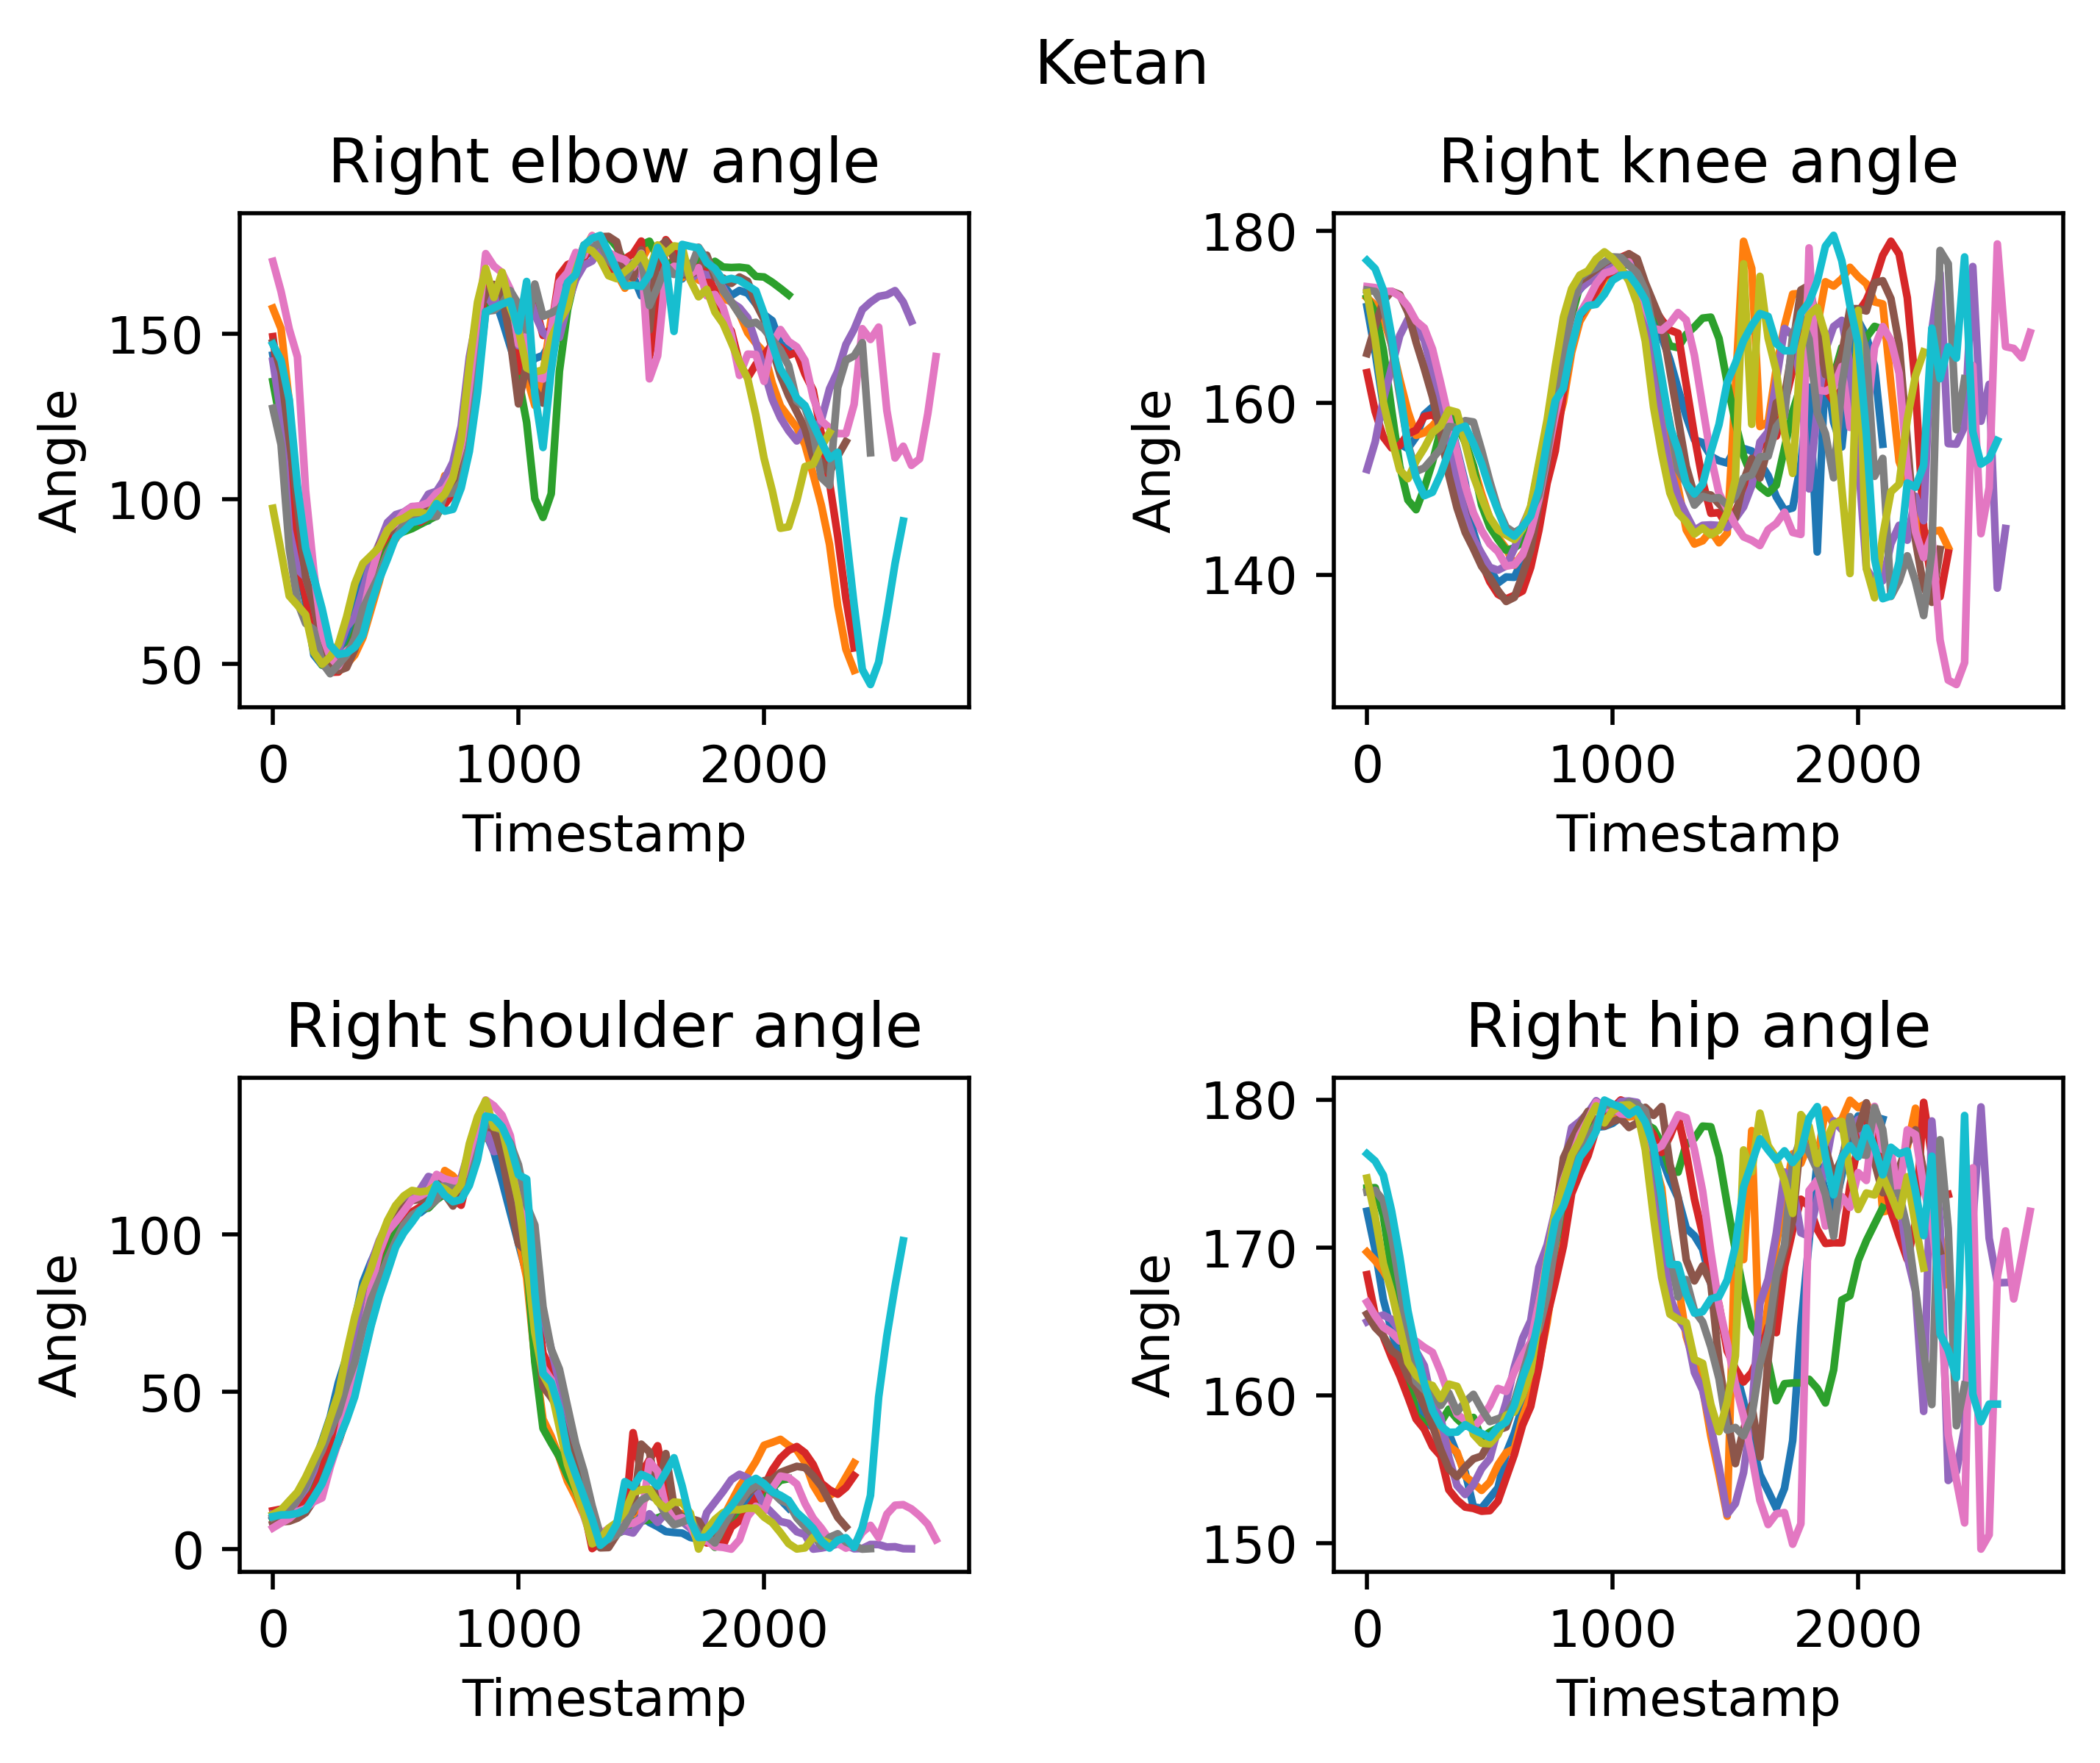

<Figure size 10000x10000 with 0 Axes>

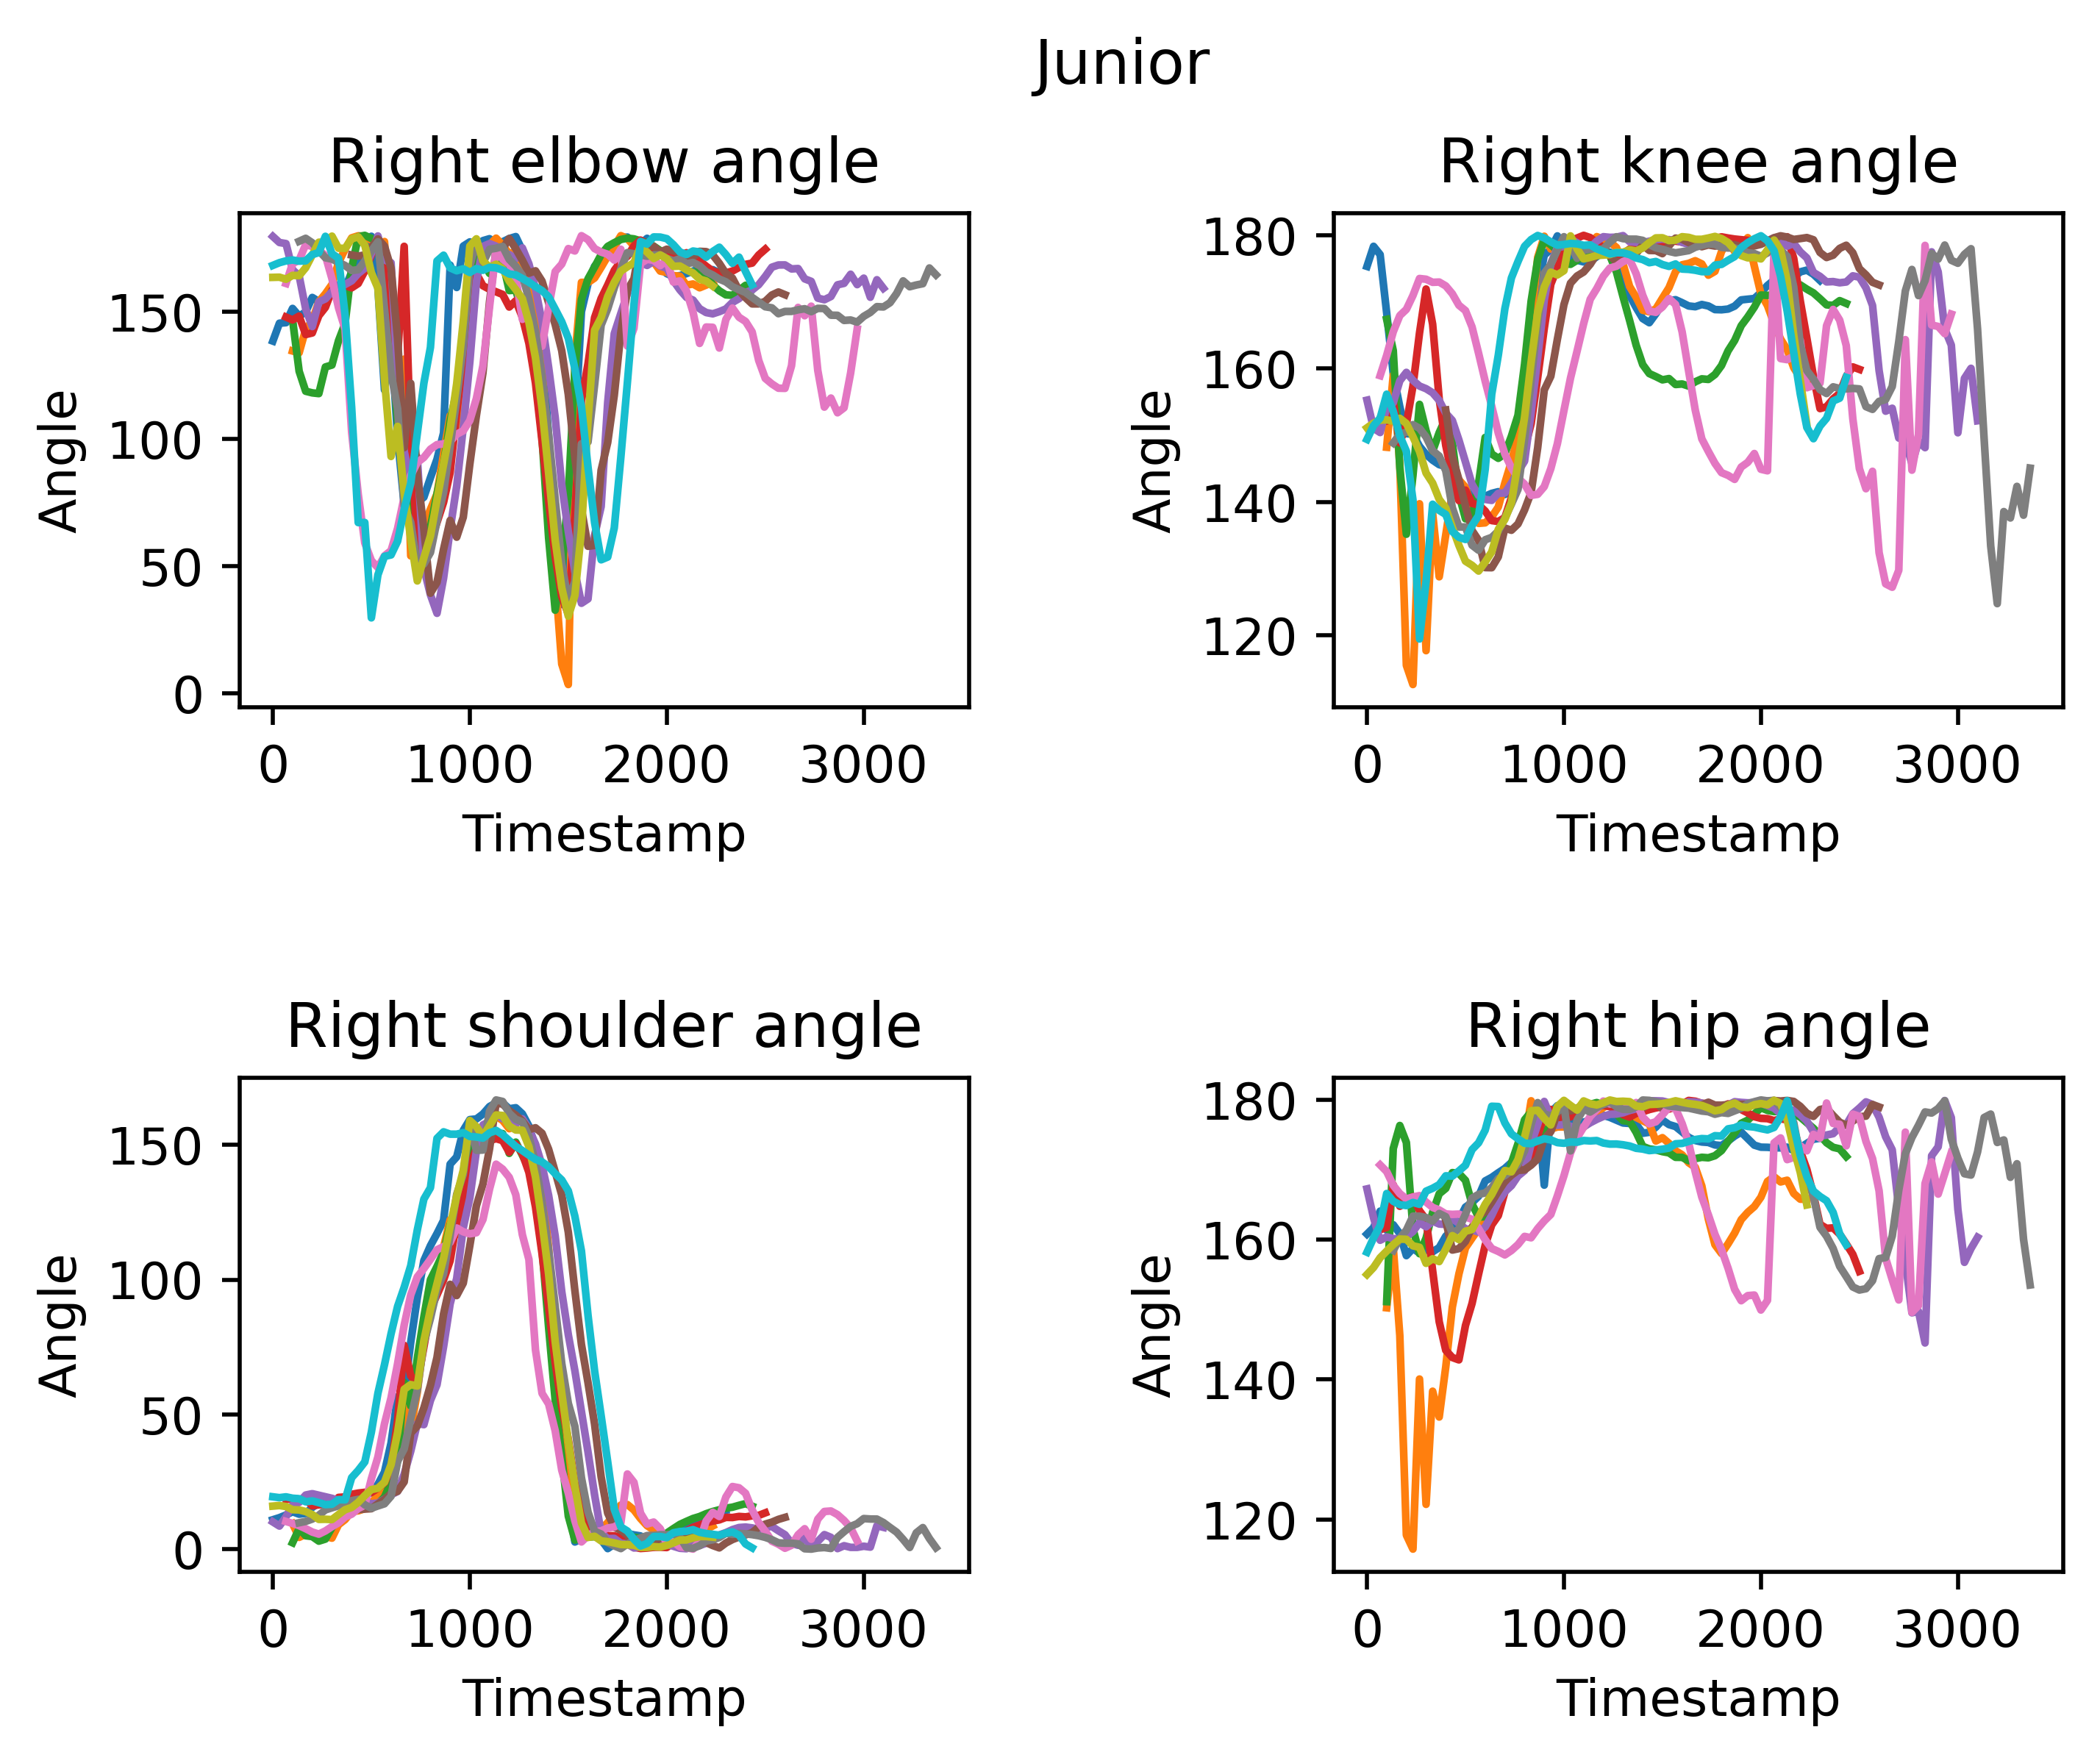

<Figure size 10000x10000 with 0 Axes>

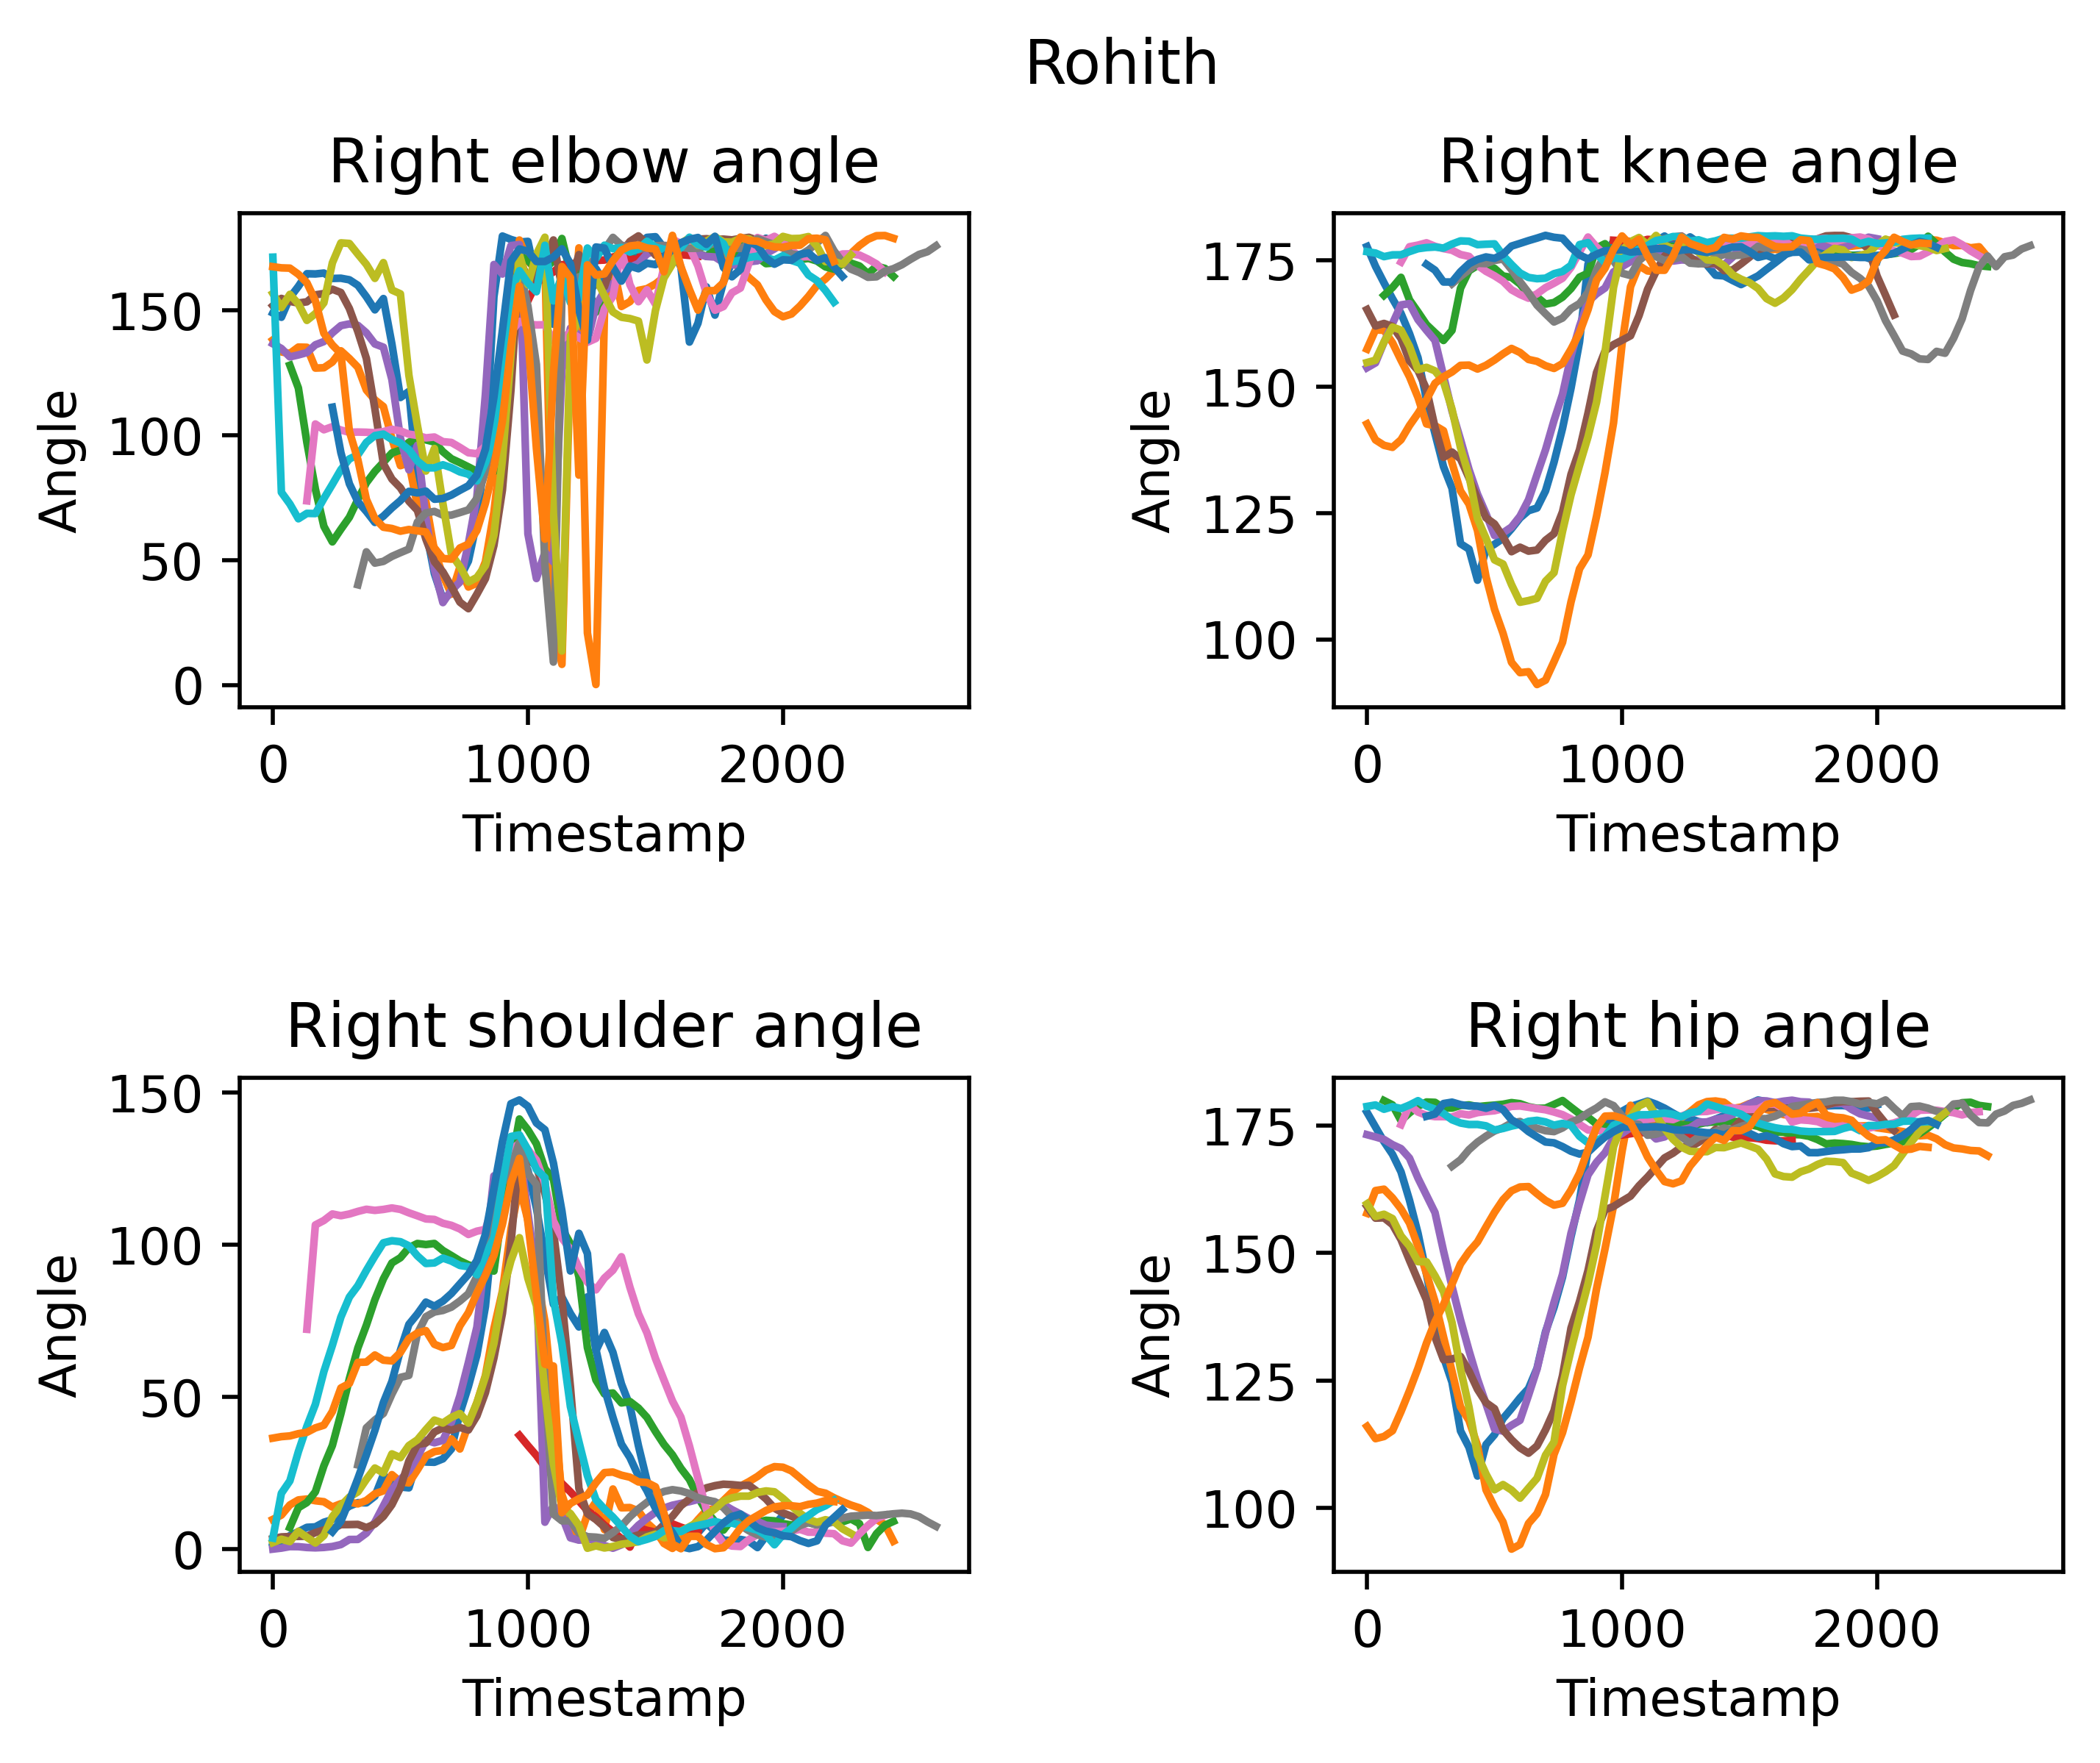

<Figure size 10000x10000 with 0 Axes>

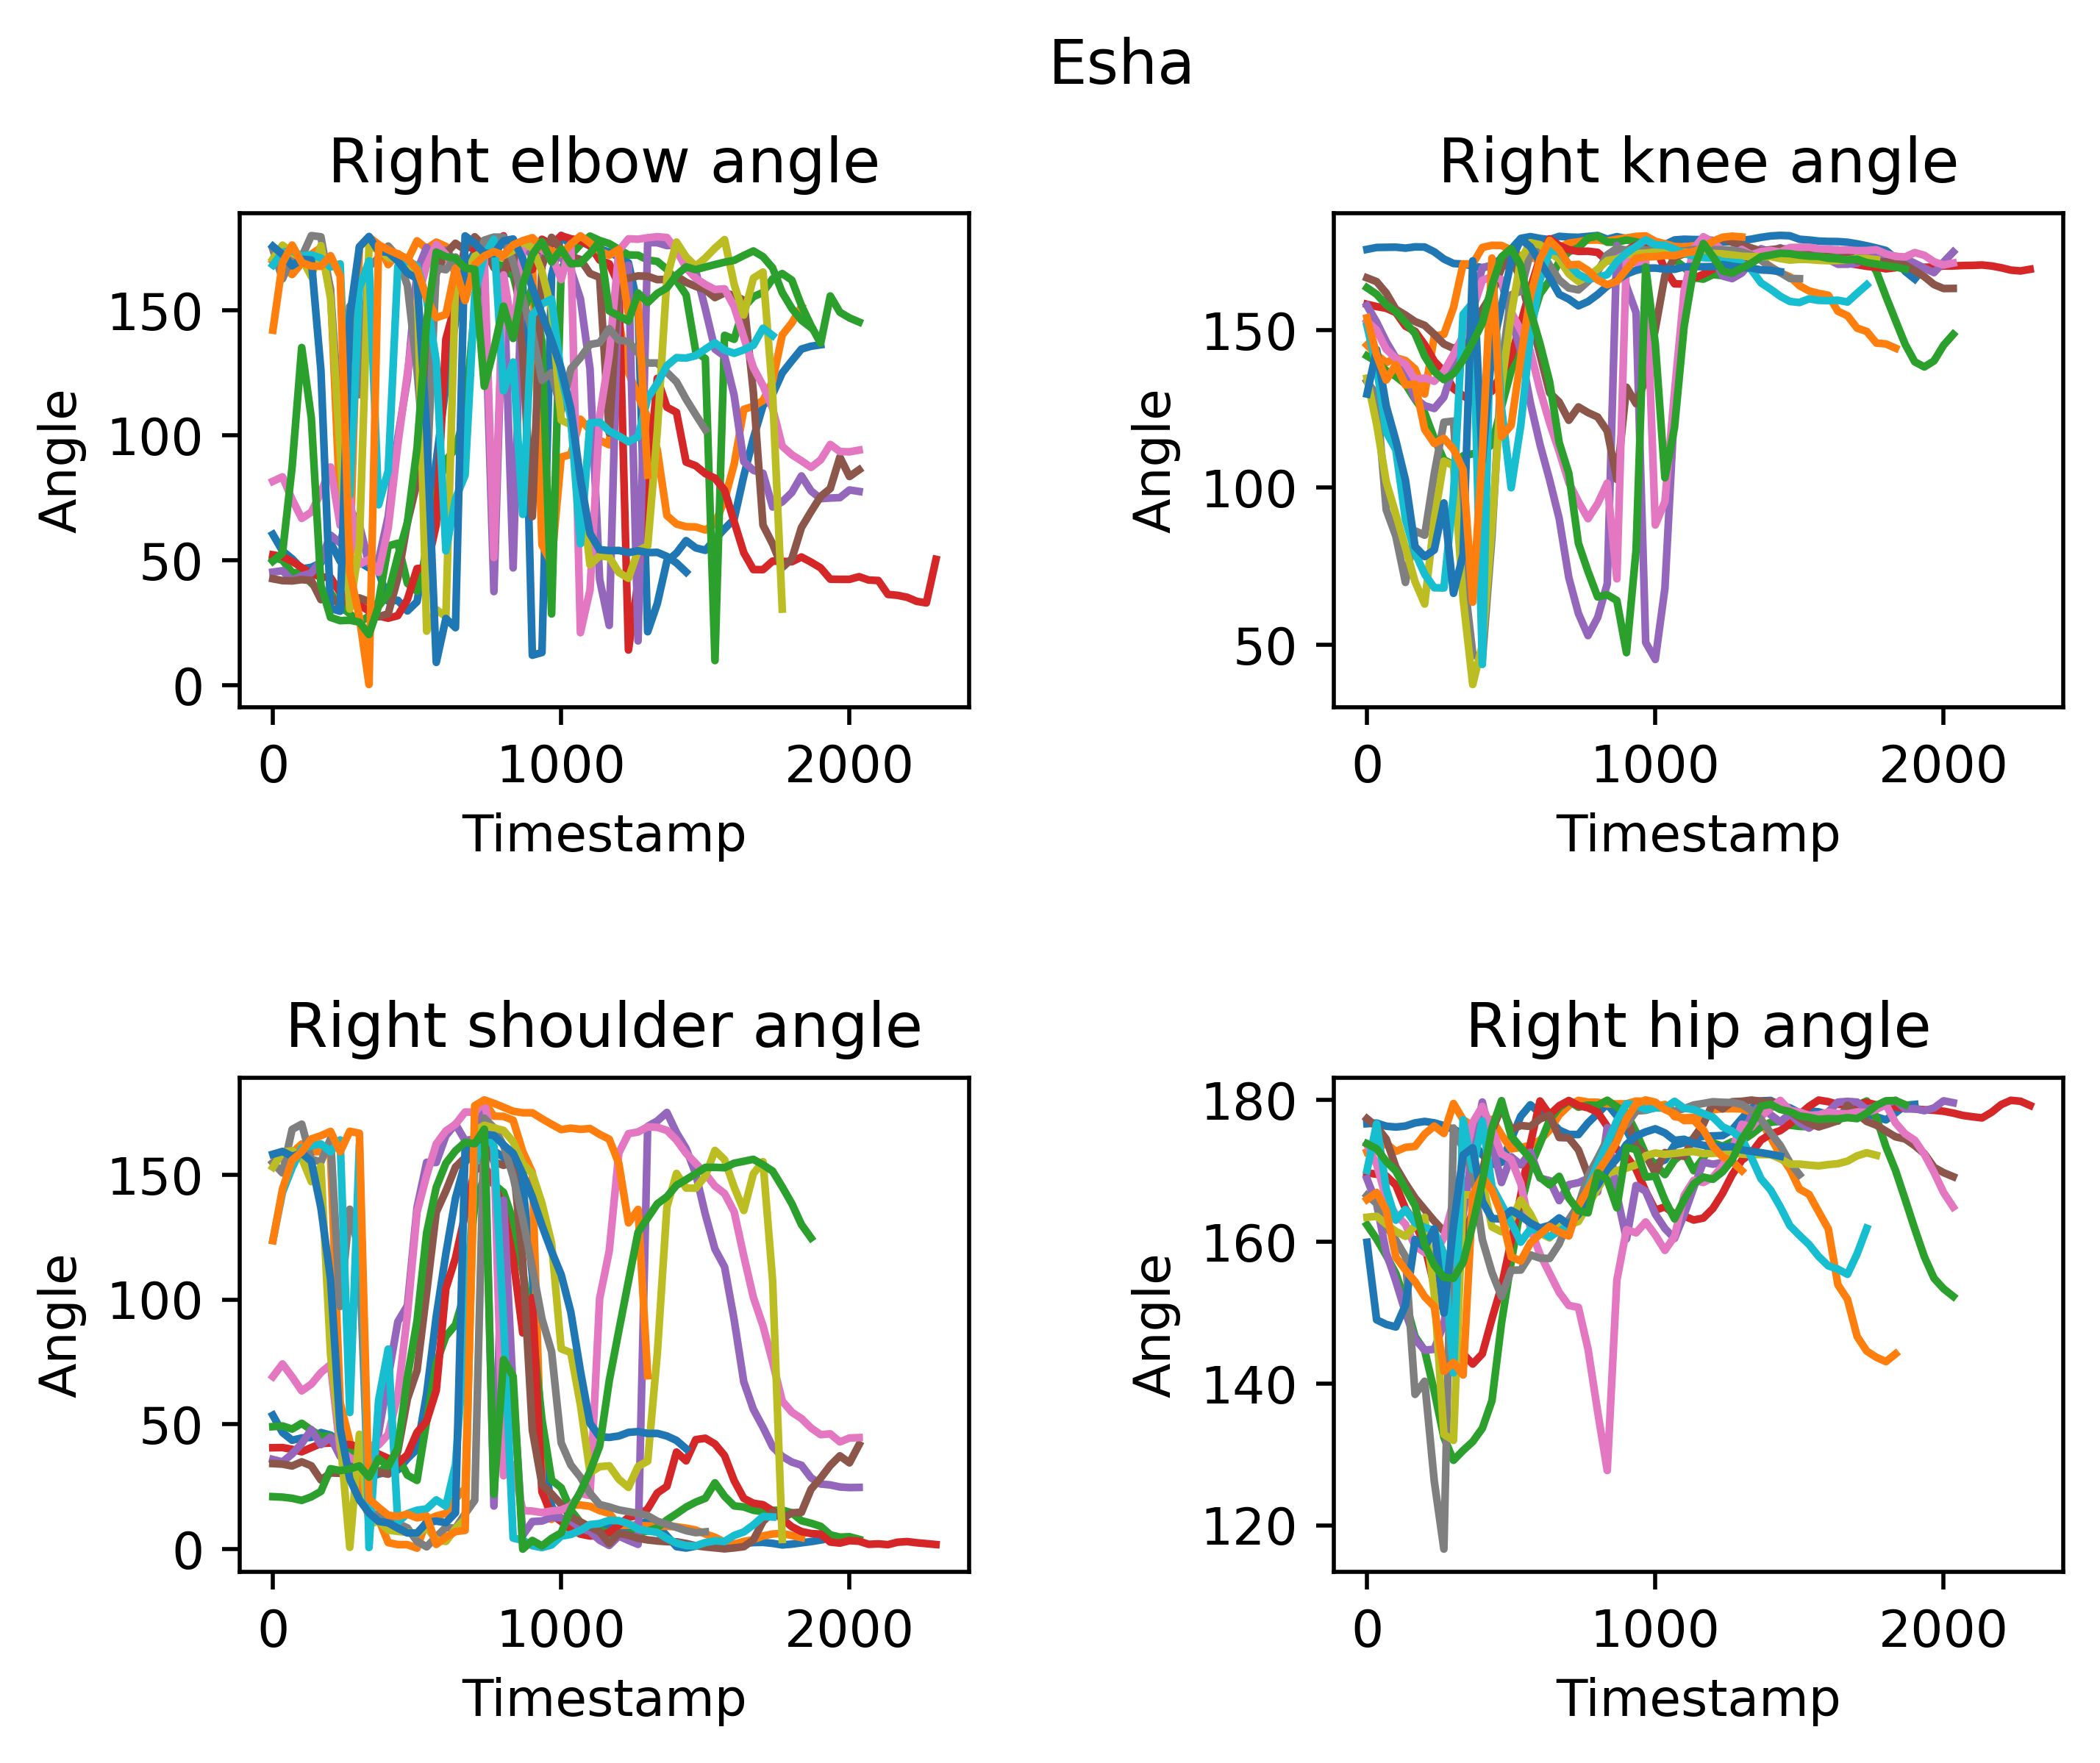

<Figure size 10000x10000 with 0 Axes>

In [ ]:
players = ['Samuel', 'Adithya', 'Shubham', 'Harsh', 'Jayesh', 'Ketan', 'Junior', 'Rohith', 'Esha']
import time
def displayGraph(player):
    df = pd.read_csv('/content/drive/MyDrive/Basketball videos/'+player+'.csv')
    grouped = df.groupby('video_title')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
    plt.suptitle(player)
    ax1.set_xlabel('Timestamp')
    ax2.set_xlabel('Timestamp')
    ax3.set_xlabel('Timestamp')
    ax4.set_xlabel('Timestamp')
    ax1.set_ylabel('Angle')
    ax2.set_ylabel('Angle')
    ax3.set_ylabel('Angle')
    ax4.set_ylabel('Angle')
    for group_name, group in grouped:
        #print(group)
        X = np.array(group['timestamps'])
        Y1 = np.array(group['angle_elbow_right'])
        ax1.plot(X, Y1)
        ax1.set_title('Right elbow angle')
        Y2 = np.array(group['angle_knee_right'])
        ax2.plot(X, Y2)
        ax2.set_title('Right knee angle')
        Y3 = np.array(group['angle_shoulder_right'])
        ax3.plot(X, Y3)
        ax3.set_title('Right shoulder angle')
        Y4 = np.array(group['angle_hip_right'])
        ax4.plot(X, Y4)
        ax4.set_title('Right hip angle')
    plt.figure(figsize=(20, 20))
    plt.rcParams['figure.dpi'] = 500
    fig.subplots_adjust(hspace=0.75, wspace=0.5)
    plt.show()

for player in players:
    displayGraph(player)